# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
112910,0,0.385742,50.0,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0
112911,0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0
112912,0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0
112913,0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0


In [2]:
# 检查数据维度
data.shape

(112915, 11)

In [3]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
# 清除缺失值
data.dropna(inplace=True)
data.isnull().sum(axis=0)

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### 以下为操作题

#### 1.数据预处理之离散化

Text(0.5, 0, 'Positive or negative')

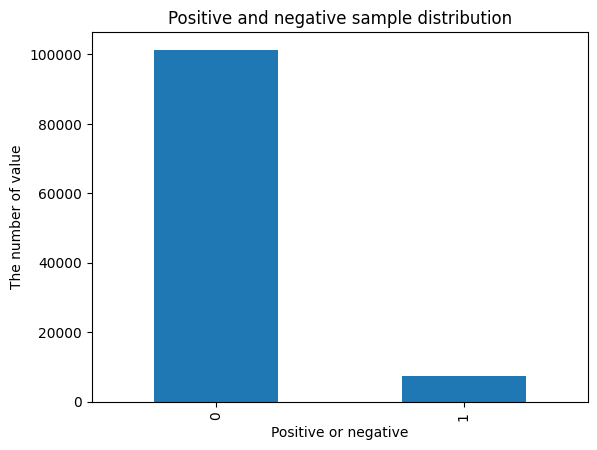

In [5]:
import matplotlib.pyplot as plt
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
data_counts = data['SeriousDlqin2yrs'].value_counts()

# 绘制两种类别的柱状图
fig = plt.figure()
data_counts.plot(kind='bar')
plt.title('Positive and negative sample distribution')
plt.ylabel('The number of value')
plt.xlabel('Positive or negative')

In [6]:
# 请对年龄按照3岁一个区间进行离散化
import numpy as np

print(data['age'].min())
print(data['age'].max())

if 0 in data['age']:
    print('0 in ages')       # 啊？刚出生就能贷款，牛蛙！

0.0
103.0
0 in ages


In [7]:
bins = np.arange(0, 106, 3)
data['age_grouped'] = pd.cut(data['age'], bins)
data[['age','age_grouped']]

,age,age_grouped
0,45.0,"(42, 45]"
1,40.0,"(39, 42]"
2,38.0,"(36, 39]"
3,30.0,"(27, 30]"
4,49.0,"(48, 51]"
...,...,...
112910,50.0,"(48, 51]"
112911,74.0,"(72, 75]"
112912,44.0,"(42, 45]"
112913,30.0,"(27, 30]"


In [8]:
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_grouped
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,"(42, 45]"
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,"(39, 42]"
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,"(36, 39]"
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,"(27, 30]"
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,"(48, 51]"
...,...,...,...,...,...,...,...,...,...,...,...,...
112910,0,0.385742,50.0,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0,"(48, 51]"
112911,0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0,"(72, 75]"
112912,0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0,"(42, 45]"
112913,0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0,"(27, 30]"


#### 2.数据预处理之独热向量编码

In [9]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
df1 = pd.get_dummies(data[['age_grouped']], dtype='int')
df = data.merge(df1.drop(columns='age_grouped_(0, 3]'), left_index=True, right_index=True).drop(columns=['age', 'age_grouped'])
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_grouped_(3, 6]","age_grouped_(6, 9]","age_grouped_(9, 12]","age_grouped_(12, 15]","age_grouped_(15, 18]","age_grouped_(18, 21]","age_grouped_(21, 24]","age_grouped_(24, 27]","age_grouped_(27, 30]","age_grouped_(30, 33]","age_grouped_(33, 36]","age_grouped_(36, 39]","age_grouped_(39, 42]","age_grouped_(42, 45]","age_grouped_(45, 48]","age_grouped_(48, 51]","age_grouped_(51, 54]","age_grouped_(54, 57]","age_grouped_(57, 60]","age_grouped_(60, 63]","age_grouped_(63, 66]","age_grouped_(66, 69]","age_grouped_(69, 72]","age_grouped_(72, 75]","age_grouped_(75, 78]","age_grouped_(78, 81]","age_grouped_(81, 84]","age_grouped_(84, 87]","age_grouped_(87, 90]","age_grouped_(90, 93]","age_grouped_(93, 96]","age_grouped_(96, 99]","age_grouped_(99, 102]","age_grouped_(102, 105]"
0,1,0.766127,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.957151,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.658180,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.233810,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.907239,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112910,0,0.385742,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112911,0,0.040674,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
112912,0,0.299745,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112913,0,0.000000,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 3.把数据切分成训练集和测试集

In [10]:
# 取出对应的X和y
y = df['SeriousDlqin2yrs']
X = df.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

In [11]:
from sklearn.model_selection import train_test_split
# 把数据切分成70%的训练集，30%的测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 查看训练集跟测试集的维度---原来数据集的维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X.shape

((76053, 43), (32595, 43), (76053,), (32595,), (108648, 43))

#### 4.数据预处理之幅度缩放

In [12]:
# 请对连续值特征进行幅度缩放
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

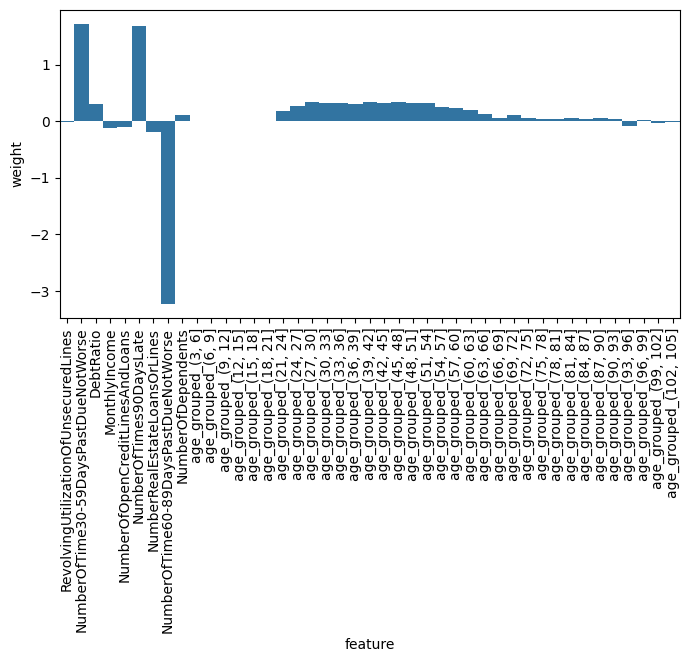

In [13]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression
import seaborn as sns

lr = LogisticRegression(C=1000.0,random_state=0, penalty='l2', solver='liblinear') 
lr.fit(X_train_std, y_train)
weights = lr.coef_
features = [df.columns[i] for i in range(1, df.shape[1])]
df_weight = pd.DataFrame({
    'feature': features,
    'weight': weights[0]
})

plt.figure(figsize=(8,4))
sns.barplot(data=df_weight, x=df_weight['feature'], y=df_weight['weight'], width=1)
plt.xticks(df_weight['feature'], rotation=90)
plt.show() # 影响最大的是NumberOfTime60-89DaysPastDueNotWorse、RevolvingUtilizationOfUnsecuredLines 跟 NumberOfTimes90DaysLate

#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10, 100, 500]
}

grid_search = GridSearchCV(LogisticRegression(solver='liblinear',random_state=0), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'C': [1, 10, 100, 500], 'penalty': ['l1', 'l2']})

In [15]:
grid_search.score(X_test, y_test)

0.9337628470624328

In [16]:
# 输出最好的超参数
# 输出最好的模型
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'penalty': 'l1'}
0.9330466874231254


In [17]:
lr = LogisticRegression(C=1, random_state=0, penalty='l1', solver='liblinear') 
lr.fit(X_train_std, y_train)

LogisticRegression(C=1, penalty='l1', random_state=0, solver='liblinear')

#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

Misclassified number: 2160
--------------------------------------------------
Test accuracy score: 0.9337
Train accuracy score: 0.9333
--------------------------------------------------
Test recall score: 0.0447
Train recall score: 0.0431
--------------------------------------------------
auc: 0.5209
--------------------------------------------------
Test f1 score: 0.0824
Train f1 score: 0.0804
--------------------------------------------------
confusion matrix:
[[30338    86]
 [ 2074    97]]
--------------------------------------------------


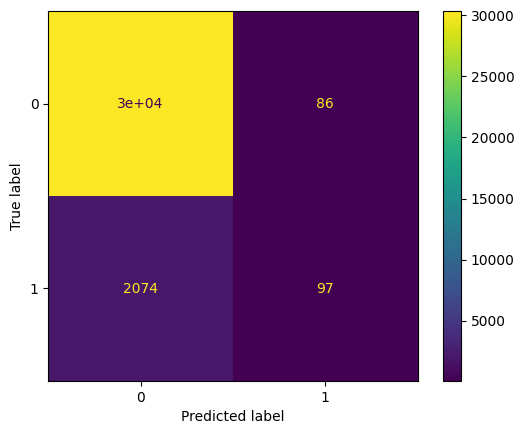

In [18]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay

# 预测 ---> 检验
y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

print('Misclassified number: %d' % (y_test != y_test_pred).sum()) 
print('-' * 50)

# accuracy_score
print('Test accuracy score: %0.4f' % accuracy_score(y_test, y_test_pred))
print('Train accuracy score: %0.4f' % accuracy_score(y_train, y_train_pred))
print('-' * 50)

# recall_score
print('Test recall score: %0.4f' % recall_score(y_test, y_test_pred)) 
print('Train recall score: %0.4f' % recall_score(y_train, y_train_pred))
print('-' * 50)

# auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
print('auc: %0.4f' % metrics.auc(fpr, tpr))
print('-' * 50)

# f1_score
print('Test f1 score: %0.4f' % f1_score(y_test, y_test_pred)) 
print('Train f1 score: %0.4f' % f1_score(y_train, y_train_pred))
print('-' * 50)

# confusion_matrix
print('confusion matrix:')
print(confusion_matrix(y_test, y_test_pred)) 
print('-' * 50)

confMatrix_lr = confusion_matrix(y_test, y_test_pred, labels=lr.classes_)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=confMatrix_lr, display_labels=lr.classes_)

disp_lr.plot()
plt.show()

#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

[0.02958378 0.02124566 0.05679186 ... 0.03945407 0.05062617 0.11239161]


Text(0, 0.5, 'Frequency')

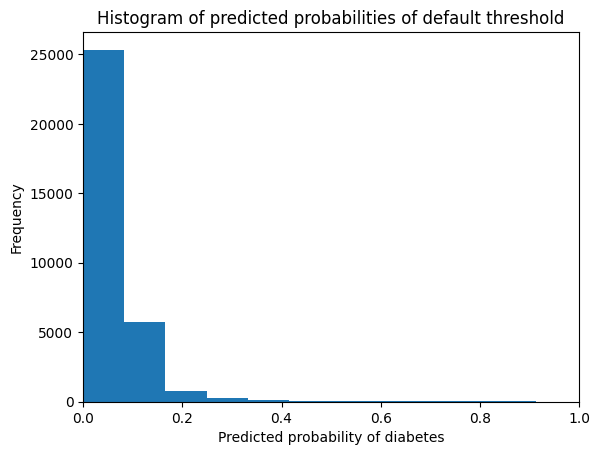

In [19]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plt

y_pred_prob = lr.predict_proba(X_test_std)[:, 1]
print(y_pred_prob)

# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=12)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities of default threshold')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')


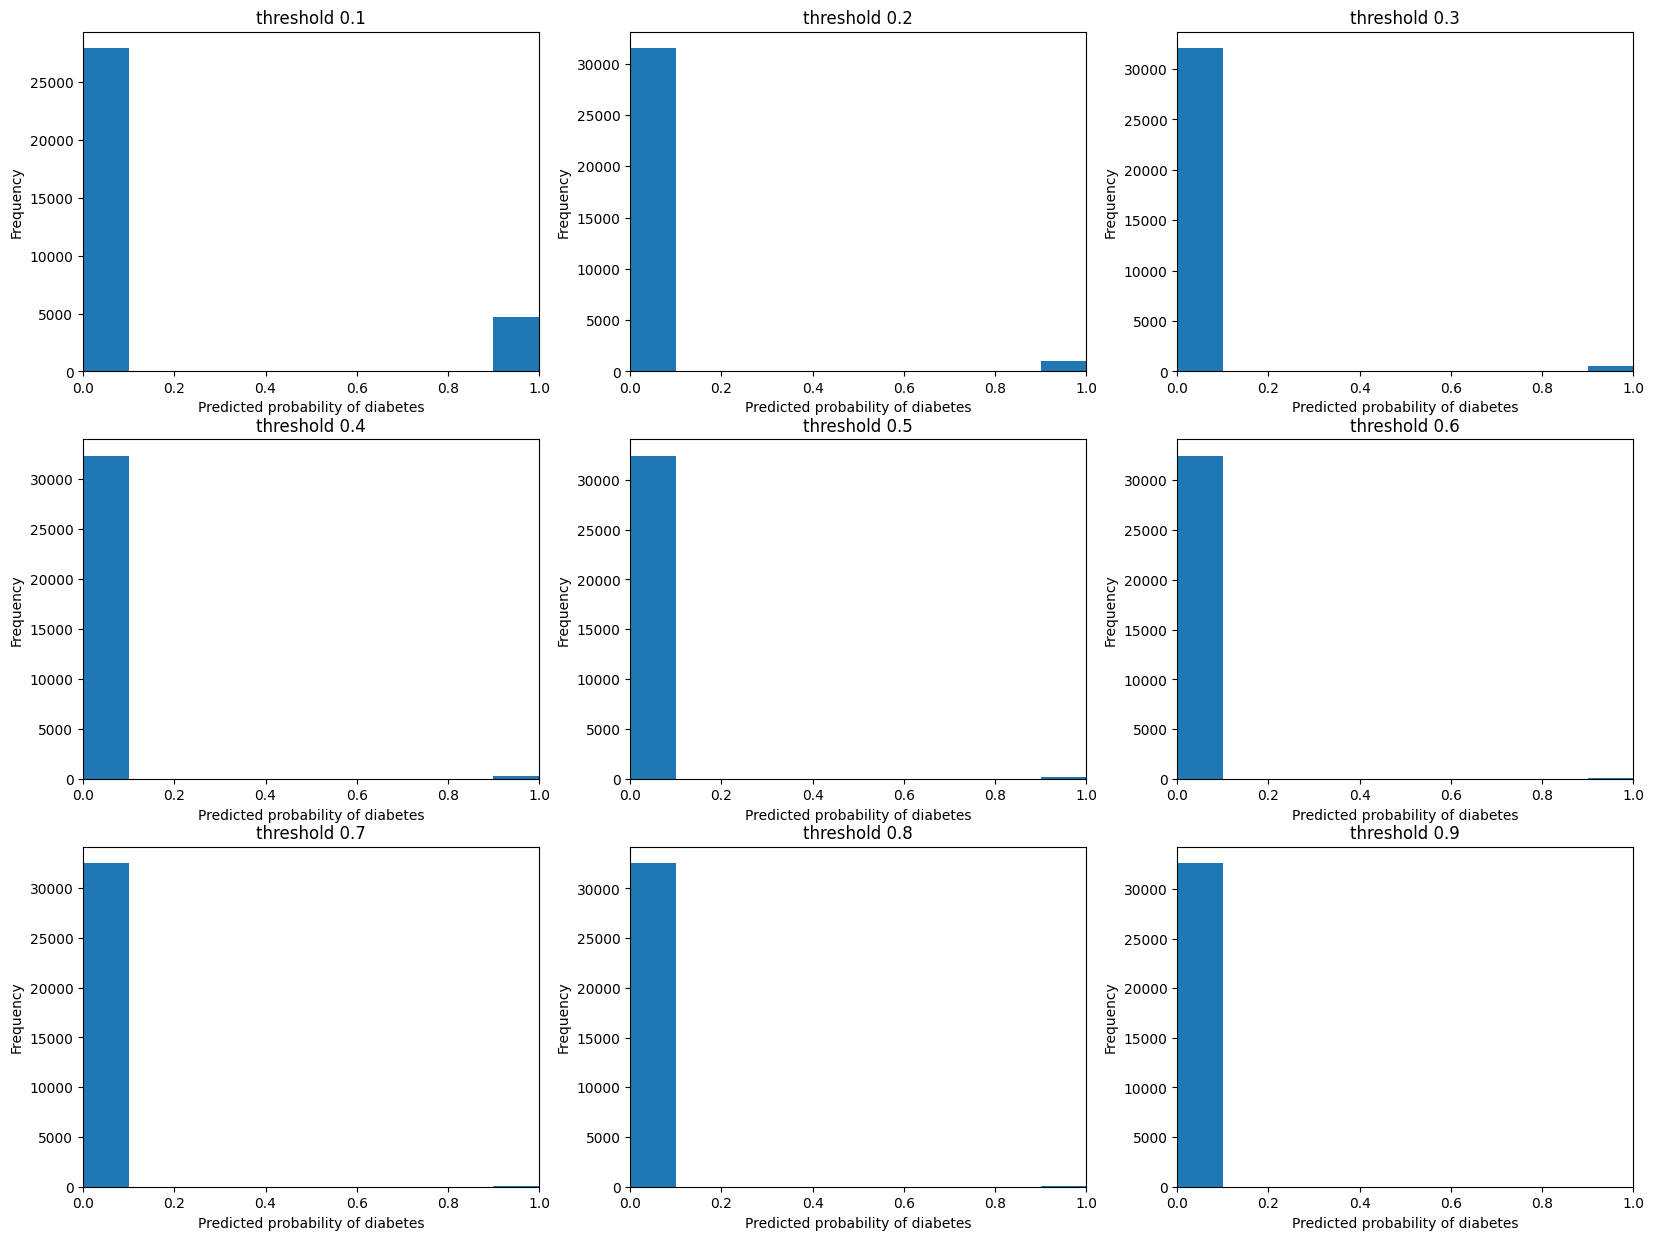

In [20]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y_pred_class = []
for i in thresholds:
    y_pred_class.append(binarize(y_pred_prob.reshape(-1, 1), threshold=i)[:,0])

plt.figure(figsize=(20, 15))
for i in range(len(thresholds)):
    plt.subplot(3, 3, i+1)
    plt.hist(y_pred_class[i])
    plt.xlim(0, 1)
    plt.title('threshold %0.1f' % thresholds[i])
    plt.xlabel('Predicted probability of diabetes')
    plt.ylabel('Frequency')


In [21]:
# 阈值设为0.3整体提升很大，除了测试精确度略有减小

def score(y_pred, ytest):
    '''给出各种评估指标
    param y_pred:预测值
    '''
    # accuracy_score
    print('Test accuracy score: %0.4f' % accuracy_score(ytest, y_pred))
    print('-' * 50)
    
    # recall_score
    print('Test recall score: %0.4f' % recall_score(ytest, y_pred_class)) 
    print('-' * 50)
    
    # auc
    fpr, tpr, thresholds = metrics.roc_curve(ytest, y_pred_class)
    print('auc: %0.4f' % metrics.auc(fpr, tpr))
    print('-' * 50)
    
    # f1_score
    print('Test f1 score: %0.4f' % f1_score(ytest, y_pred_class)) 
    print('-' * 50)
    
    # confusion_matrix
    print('confusion matrix:')
    print(confusion_matrix(ytest, y_pred_class)) 
    print('-' * 50)
    
    confMatrix_lr = confusion_matrix(ytest, y_pred_class, labels=lr.classes_)
    disp_lr = ConfusionMatrixDisplay(confusion_matrix=confMatrix_lr, display_labels=lr.classes_)
    
    disp_lr.plot()
    plt.show()          

Test accuracy score: 0.9329
--------------------------------------------------
Test recall score: 0.1124
--------------------------------------------------
auc: 0.5519
--------------------------------------------------
Test f1 score: 0.1825
--------------------------------------------------
confusion matrix:
[[30165   259]
 [ 1927   244]]
--------------------------------------------------


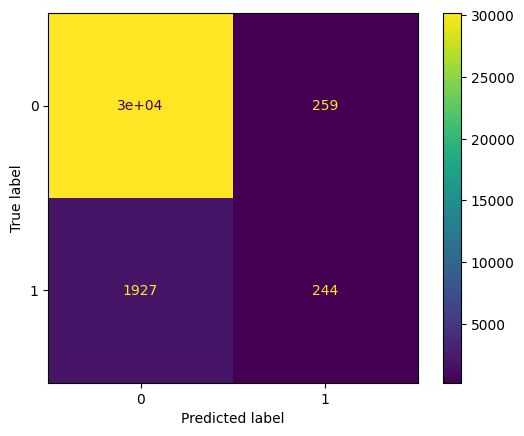

In [22]:
y_pred_class = binarize(y_pred_prob.reshape(-1, 1), threshold=0.3)[:,0]

score(y_pred_class, y_test)

#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

 1) RevolvingUtilizationOfUnsecuredLines 0.186148
 2) DebtRatio                      0.168685
 3) MonthlyIncome                  0.164856
 4) NumberOfOpenCreditLinesAndLoans 0.099646
 5) NumberOfTimes90DaysLate        0.084623
 6) NumberOfTime30-59DaysPastDueNotWorse 0.060808
 7) NumberOfTime60-89DaysPastDueNotWorse 0.046622
 8) NumberOfDependents             0.045782
 9) NumberRealEstateLoansOrLines   0.033894
10) age_grouped_(48, 51]           0.008338
11) age_grouped_(45, 48]           0.008226
12) age_grouped_(42, 45]           0.007979
13) age_grouped_(51, 54]           0.007867
14) age_grouped_(39, 42]           0.007727
15) age_grouped_(36, 39]           0.007454
16) age_grouped_(30, 33]           0.006711
17) age_grouped_(33, 36]           0.006682
18) age_grouped_(54, 57]           0.006523
19) age_grouped_(57, 60]           0.006058
20) age_grouped_(27, 30]           0.005770
21) age_grouped_(60, 63]           0.005328
22) age_grouped_(24, 27]           0.004538
23) age_group

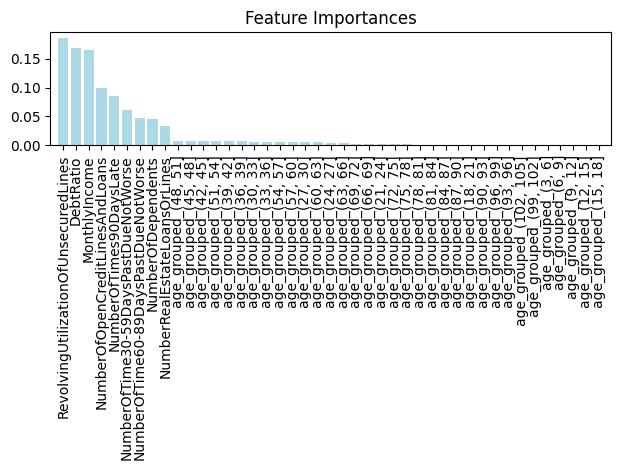

In [23]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel
from sklearn.ensemble import RandomForestClassifier

feat_labels = df.columns[1:]

forest = RandomForestClassifier(n_estimators=1000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [24]:
# selectFromModel特征选择
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.15, prefit=True)
X_selected_train = sfm.transform(X_train)
X_selected_test = sfm.transform(X_test)

X_selected_train.shape

E:\Software\Python3.10.11\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
E:\Software\Python3.10.11\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(76053, 3)

In [25]:
# 训练 ---> 评估
forest.fit(X_selected_train, y_train)

y_train_pred = forest.predict(np.array(X_selected_train)) 
y_test_pred = forest.predict(np.array(X_selected_test))

# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) 

from sklearn.metrics import accuracy_score
print('(accuracy_score) Training accuracy: %.4f' % accuracy_score(y_train, y_train_pred)) # 训练集的正确率
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率


Misclassified samples in test set: 2256
(accuracy_score) Training accuracy: 0.9989
(accuracy_score) Test accuracy: 0.9308


Test accuracy score: 0.9308
--------------------------------------------------
Test recall score: 0.1124
--------------------------------------------------
auc: 0.5519
--------------------------------------------------
Test f1 score: 0.1825
--------------------------------------------------
confusion matrix:
[[30165   259]
 [ 1927   244]]
--------------------------------------------------


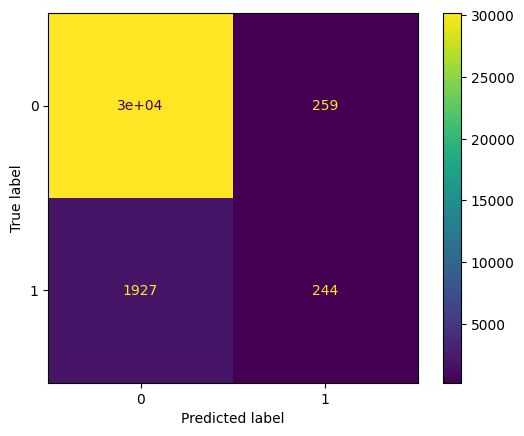

In [26]:
# 各种评估
score(y_test_pred, y_test) # accuracy score竟然还差了一点点！

#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

##### 随机森林

In [37]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier

param_grid = {
   "n_estimators": [n for n in range(1, 101, 10)],
    "max_features": [f for f in range(1, 11, 1)]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)
forest = grid.fit(X_train, y_train)

print("best cross-validation accuracy:", grid.best_score_)
print("test set score: ", grid.score(X_test, y_test))
print("best parameters: ", grid.best_params_)

best cross-validation accuracy: 0.9336515429616019
test set score:  0.935020708697653
best parameters:  {'max_features': 8, 'n_estimators': 61}


Test accuracy score: 0.9321

E:\Software\Python3.10.11\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



--------------------------------------------------
Test recall score: 0.1423
--------------------------------------------------
auc: 0.5654
--------------------------------------------------
Test f1 score: 0.2183
--------------------------------------------------
confusion matrix:
[[30073   351]
 [ 1862   309]]
--------------------------------------------------


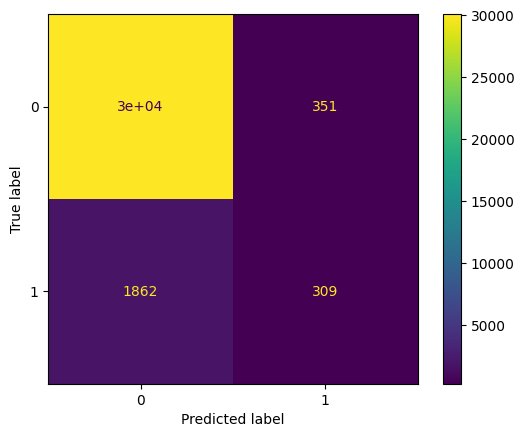

In [38]:
# 预测
y_pred_prob = forest.predict_proba(X_test)[:, 1]

# 将阈值设为 0.3
y_pred_class = binarize(y_pred_prob.reshape(-1, 1), threshold=0.3)[:,0]

# 评估模型
score(y_pred_class, y_test)

##### 支持向量机

In [35]:
# 支持向量机
from sklearn.svm import SVC

param_grid = {'C': [0.1],
              'gamma': [0.01]} # 网格参数 跑多个参数太慢了(╯‵□′)╯︵┻━┻！！！我放弃

grid = GridSearchCV(SVC(probability=True), param_grid=param_grid, cv=10) # 搜索最佳参数
svm = grid.fit(X_train_std, y_train) # 训练

print("best cross-validation accuracy:", grid.best_score_)
print("test set score: ", grid.score(X_test_std, y_test))
print("best parameters: ", grid.best_params_)

best cross-validation accuracy: 0.9324287013107581
test set score:  0.9335174106458046
best parameters:  {'C': 0.1, 'gamma': 0.01}


Test accuracy score: 0.9335
--------------------------------------------------
Test recall score: 0.0074
--------------------------------------------------
auc: 0.5035
--------------------------------------------------
Test f1 score: 0.0146
--------------------------------------------------
confusion matrix:
[[30412    12]
 [ 2155    16]]
--------------------------------------------------


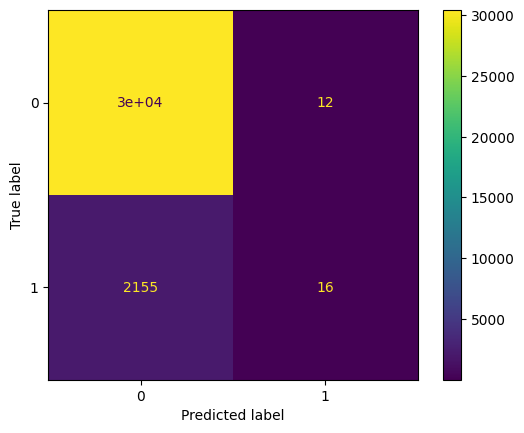

In [36]:
# 预测
y_pred_prob = svm.predict_proba(X_test_std)[:, 1]

# 将阈值设为 0.3
y_pred_class = binarize(y_pred_prob.reshape(-1, 1), threshold=0.3)[:,0]

# 评估模型
score(y_pred_class, y_test)

##### KNN

In [28]:
# K最近邻
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [k for k in range(1, 20)]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)
knn = grid.fit(X_train_std, y_train)

print("best cross-validation accuracy:", grid.best_score_)
print("test set score: ", grid.score(X_test_std, y_test))
print("best parameters: ", grid.best_params_)

best cross-validation accuracy: 0.9328363124872736
test set score:  0.9333640128854118
best parameters:  {'n_neighbors': 15}


Test accuracy score: 0.9321
--------------------------------------------------
Test recall score: 0.1257
--------------------------------------------------
auc: 0.5577
--------------------------------------------------
Test f1 score: 0.1980
--------------------------------------------------
confusion matrix:
[[30110   314]
 [ 1898   273]]
--------------------------------------------------


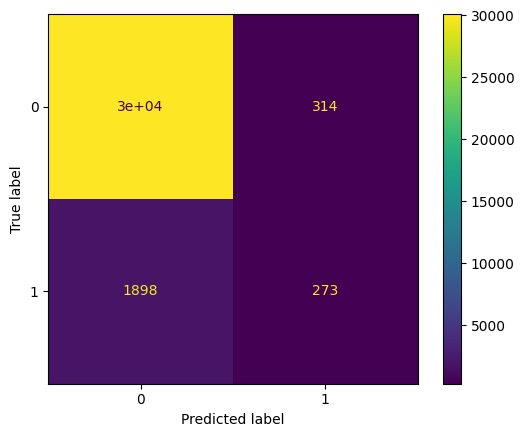

In [29]:
# 预测
y_pred_prob = knn.predict_proba(X_test_std)[:, 1]

# 将阈值设为 0.3
y_pred_class = binarize(y_pred_prob.reshape(-1, 1), threshold=0.3)[:,0]

# 评估模型
score(y_pred_class, y_test)